In [7]:
import librosa
from matplotlib import pyplot as plt
import librosa.display

In [16]:
audio_path = './samlemp3.mp3'
x, sr = librosa.load(audio_path, sr=None)
print(type(x), type(sr))

/usr/lib/python3.10/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


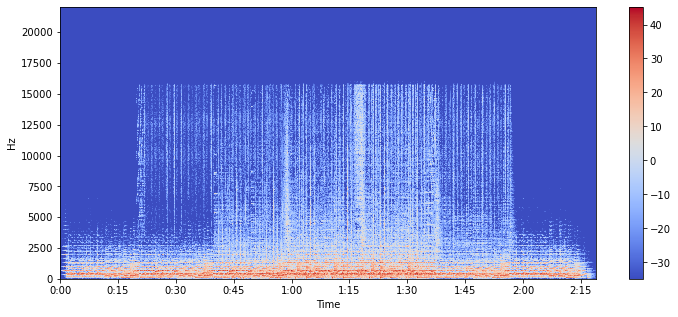

In [18]:
# Let us display the spectrogram here

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(12,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time',y_axis='hz')
plt.colorbar()

/usr/lib/python3.10/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


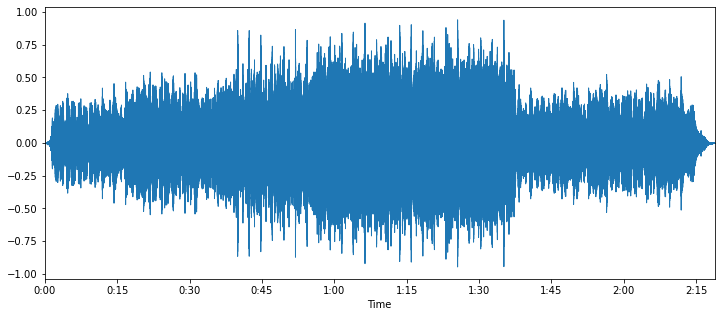

In [19]:
# understanding zero crossing rate
x, sr = librosa.load(audio_path)
plt.figure(figsize=(12,5))
librosa.display.waveplot(x, sr=sr)

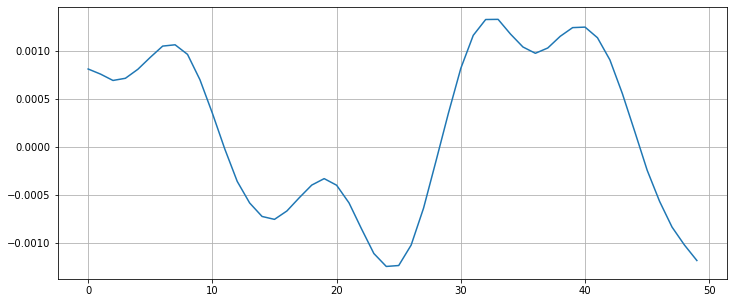

In [21]:
# understanding zooming in
n0=8000
n1=8050
plt.figure(figsize=(12,5))
plt.plot(x[n0:n1])
plt.grid()


In [24]:
zero_crossings = librosa.zero_crossings(x[n0:n1],pad=False)
print(sum(zero_crossings))


3


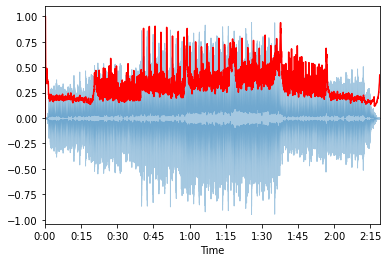

In [25]:
# understanding spectral centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

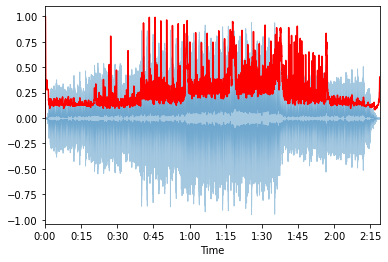

In [26]:
# Understanding spectral roll-off
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff),color='r')

(20, 5980)


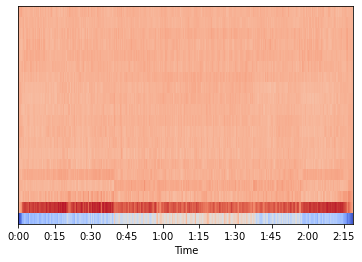

In [28]:
# understanding MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')